# Problem Statement

#### Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Automobile_insurance_fraud.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
#Checking Shape
df.shape

(1000, 40)

We have 1000 customer data

40 Columns or Attributes

In [4]:
#Checking data types
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

As we can see that there are '?' in the Dataset.We ghave to replace it Nan value

In [5]:
df=df.replace('?',np.nan)

In [6]:
#Checking Null Values
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

As we can see that collision_type, property damage and police report available has null values.
We have to repace nan values

As we can see that _c39 has 1000 nul values that means this column has no data.So we can drop it

In [7]:
df=df.drop(['_c39'],axis=1)

In [8]:
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

In [9]:
df['property_damage'].value_counts()

NO     338
YES    302
Name: property_damage, dtype: int64

In [10]:
df['police_report_available'].value_counts()

NO     343
YES    314
Name: police_report_available, dtype: int64

In [11]:
#We have repalce the collision_type type with the mode value.Bcoz it has 3 values
df['collision_type']=df['collision_type'].fillna(df['collision_type'].mode()[0])

In [12]:
#We replace property_damage,police_report_available with No.As we don't know the Actual data.

df['property_damage']=df['property_damage'].replace(np.nan,'NO')


df['police_report_available']=df['police_report_available'].replace(np.nan,'NO')

In [13]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

There are no null values present.

In [14]:
#Checking unique Values
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [15]:
#Lets Drop some unnecessary columns
df=df.drop(['policy_number','insured_zip','incident_location','auto_year','policy_bind_date','policy_state','incident_date'],axis=1)

In [16]:
df.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,sleeping,...,1,2,YES,71610,6510,13020,52080,Saab,92x,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,...,0,0,NO,5070,780,780,3510,Mercedes,E400,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,...,2,3,NO,34650,7700,3850,23100,Dodge,RAM,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,...,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,board-games,...,0,1,NO,6500,1300,650,4550,Accura,RSX,N


In [17]:
#Chcking Inside of the Data
df_obj=df.select_dtypes(include='object')

for i in df_obj:
    print('\n')
    print('**********',i,'**********')
    print(df_obj[i].value_counts())



********** policy_csl **********
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64


********** insured_sex **********
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64


********** insured_education_level **********
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64


********** insured_occupation **********
machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64


********** insured_hobbies **********
reading           64
exercise          57
paintball         57
bungie-jumping    56
golf              55
ca

### Statistcal Summery

In [18]:
df.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000


Months_as_customer,umbrella_limit,capital_gains,injury_claim,property_claim contain zero as a miminum values.

Policy_deductable,injury_claim,property_claim are right skewed because mean value is greater than median value.

Vehicle_claim,total_claim_amount,captial_gains are left skewed in nature.

# Data Visualization

In [19]:
#Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

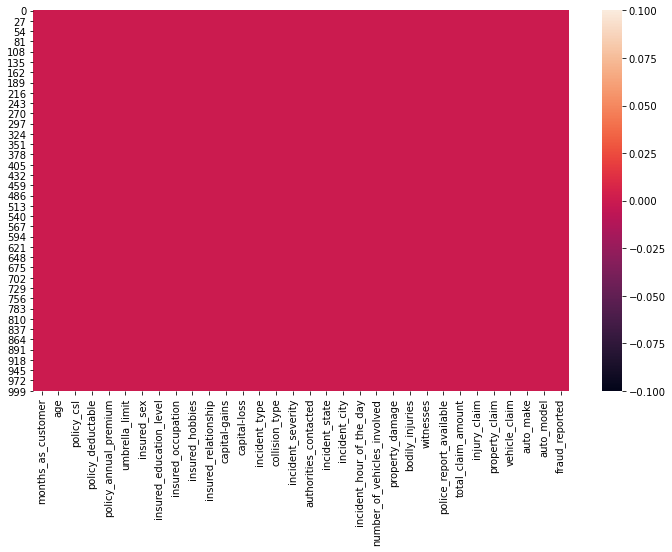

In [20]:
#Checking Null Values using heatmap
plt.figure(figsize=(12,7))
sns.heatmap(df.isnull())
plt.show()

<AxesSubplot:title={'center':'Fraud(Target) Value Counts'}, xlabel='fraud_reported', ylabel='count'>

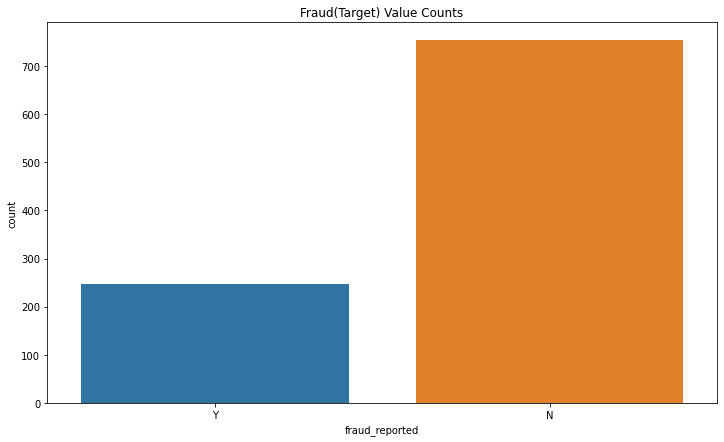

In [21]:
plt.figure(figsize=(12,7))
plt.title('Fraud(Target) Value Counts')
sns.countplot(df['fraud_reported'], data=df)

In This Dataset there are more number of No's.That means more number of Fraud cases

In [22]:
def value_count(df,col):
    plt.figure(figsize=(12,7))
    plt.title(col)
    sns.countplot(df[col], data=df)

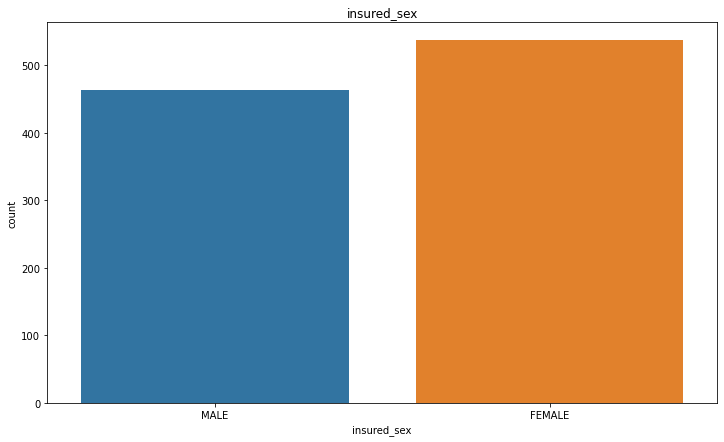

In [23]:
value_count(df,'insured_sex')

In our dataset, Females claims more than men for vehicle insurance.

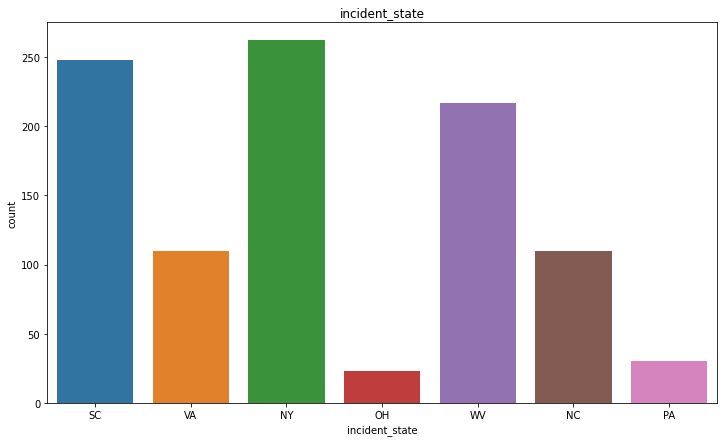

In [24]:
value_count(df,'incident_state')

Majority of accident spotted in NY than in SC.

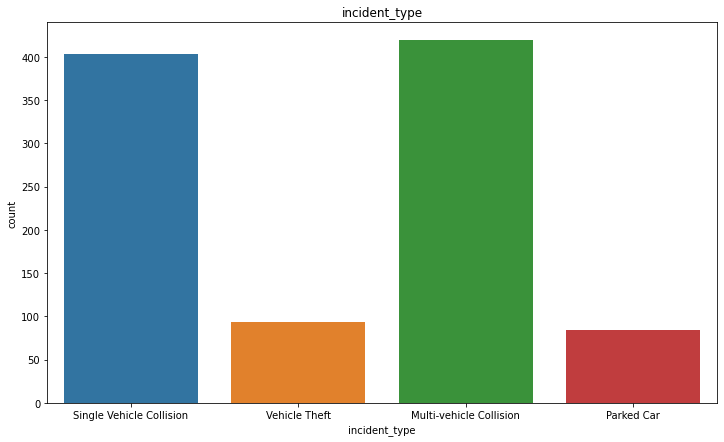

In [25]:
value_count(df,'incident_type')

Majority of insurance claimed for accidental vehicle. fer for theft vehicle.

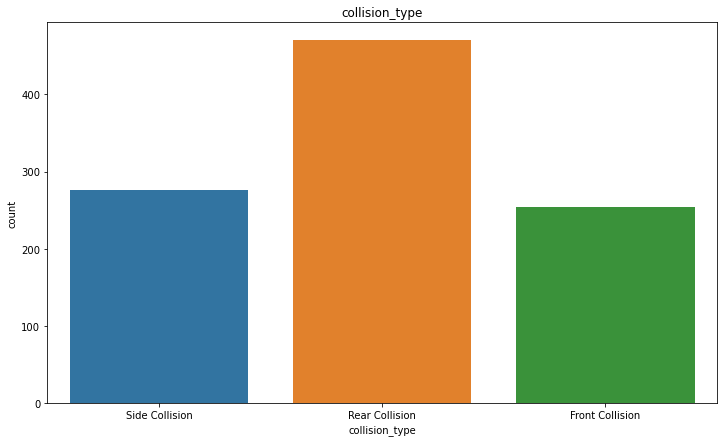

In [26]:
value_count(df,'collision_type')

Side collision & Front Collission are apporimatly same (250-260) in our dataset.

For most of vehcile, the type of collision is Rear Collision.

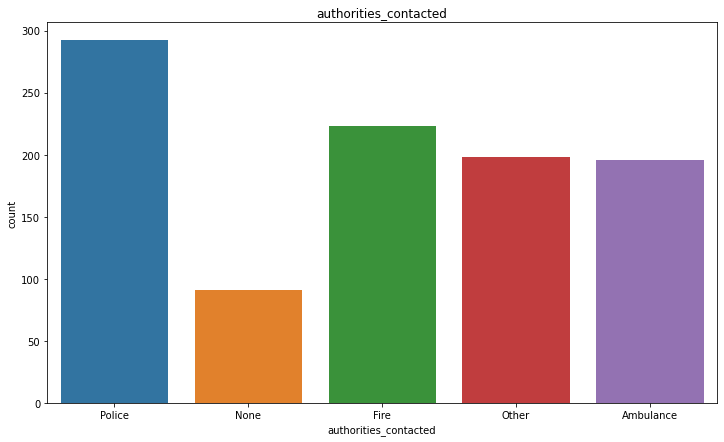

In [27]:
value_count(df,'authorities_contacted')

In most of cases, vehicle owner called to police first.

Fire after the collision may be a 2nd prime reason.

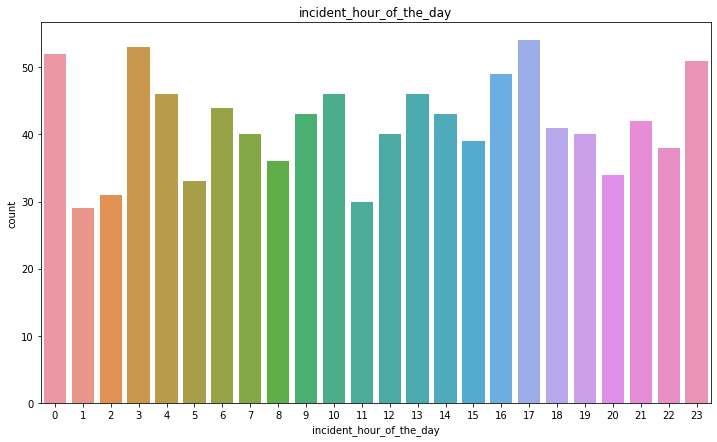

In [28]:
value_count(df,'incident_hour_of_the_day')

We can see that 12pm-5pm the chances of accidents are high.

<AxesSubplot:title={'center':'Collision type Vs Fraud Reported'}, xlabel='collision_type', ylabel='count'>

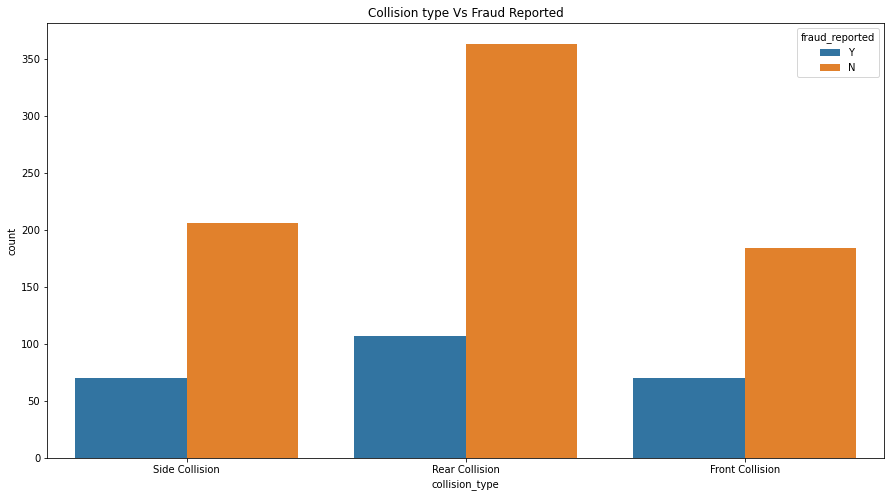

In [29]:
plt.figure(figsize=(15,8))
plt.title('Collision type Vs Fraud Reported')
sns.countplot(df['collision_type'],hue='fraud_reported',data=df)

We could see that in rear collision most claime for insurance cover. There is lease froud reported in case of Rear collision

<AxesSubplot:title={'center':'insured_relationship Vs Fraud Reported'}, xlabel='insured_relationship', ylabel='count'>

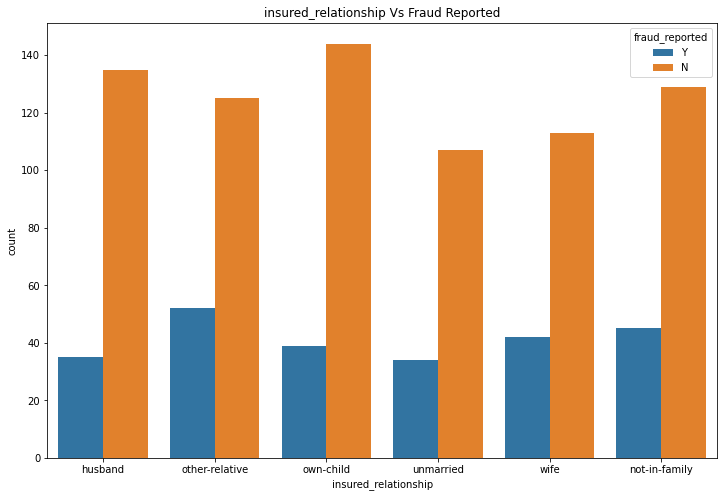

In [30]:
plt.figure(figsize=(12,8))
plt.title('insured_relationship Vs Fraud Reported')
sns.countplot(df['insured_relationship'],hue='fraud_reported',data=df)

<AxesSubplot:title={'center':'incident_severity Vs Fraud Reported'}, xlabel='incident_severity', ylabel='count'>

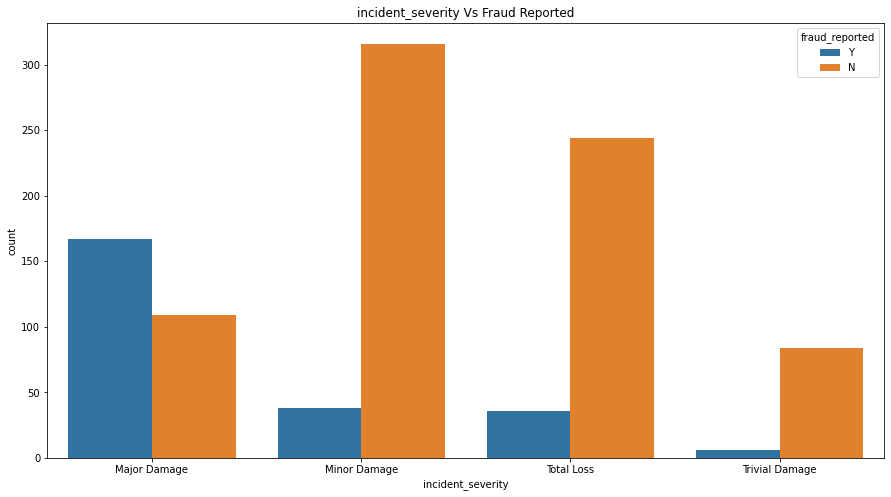

In [31]:
plt.figure(figsize=(15,8))
plt.title('incident_severity Vs Fraud Reported')
sns.countplot(df['incident_severity'],hue='fraud_reported',data=df)

-# Checking Data Distribution

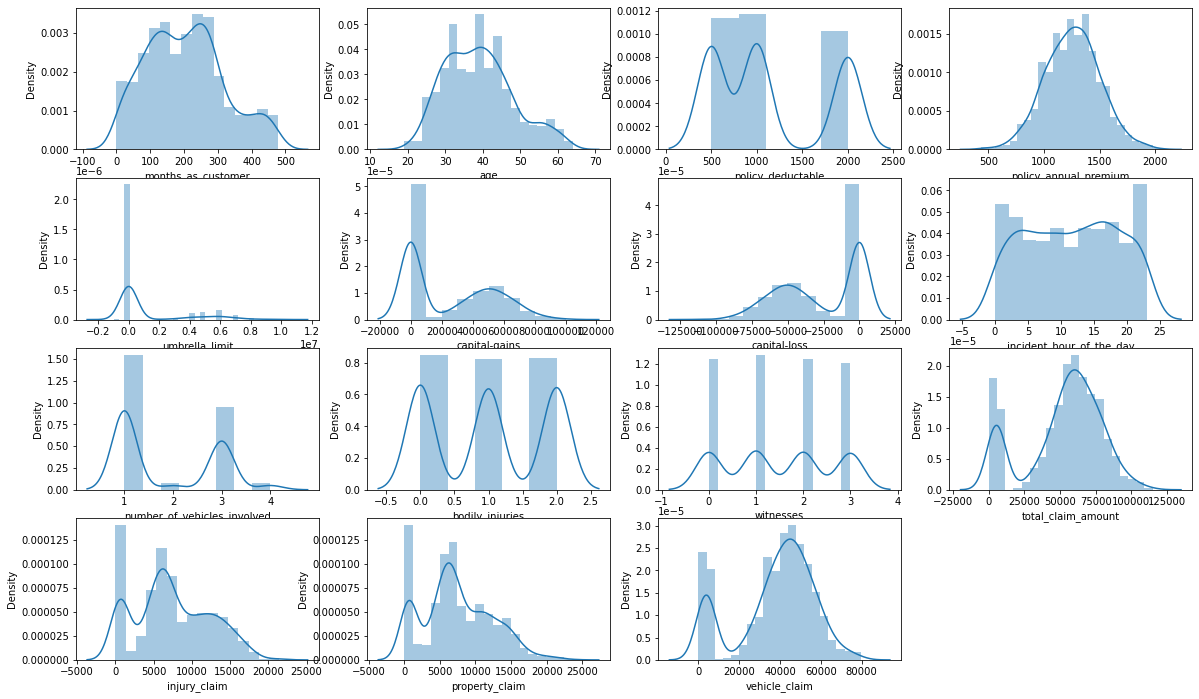

In [32]:
df_num=df.select_dtypes(exclude='object')


plt.figure(figsize=(20,12))
plot=1
for i in df_num:
    if plot<=16:
        plt.subplot(4,4,plot)
        sns.distplot(df[i])
        plot=plot+1

# Checking outliers

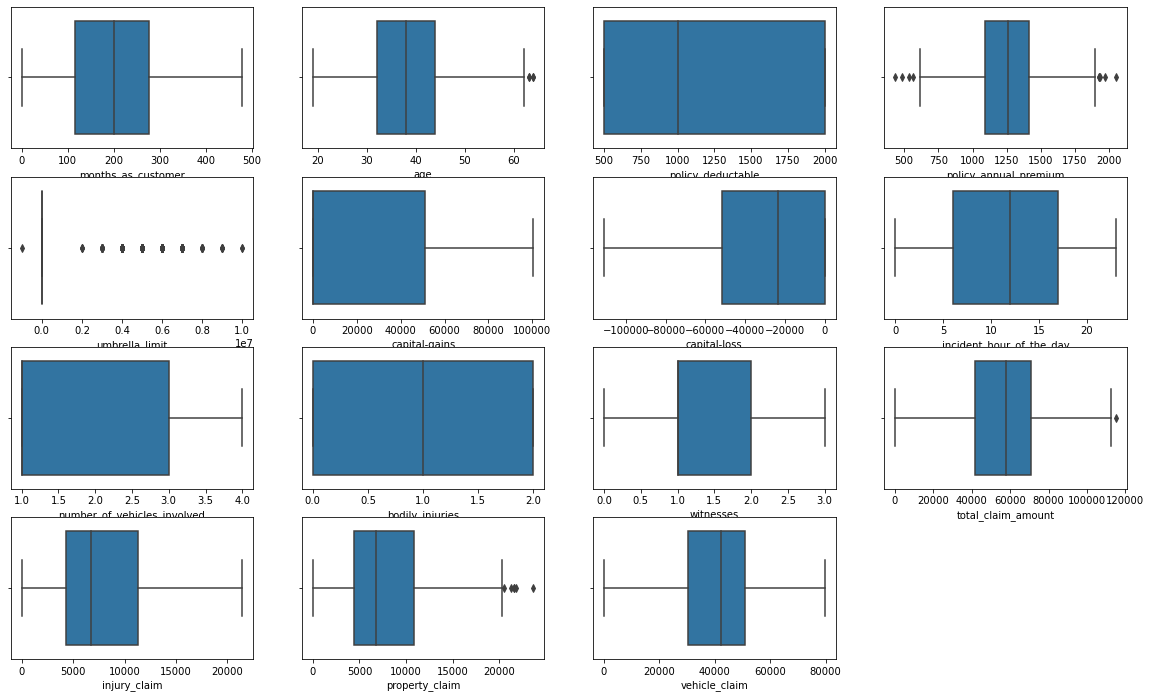

In [33]:
plt.figure(figsize=(20,12))
plot=1
for i in df_num:
    if plot<=16:
        plt.subplot(4,4,plot)
        sns.boxplot(df[i])
        plot=plot+1

We can see that maximun outliers are close to range.We have no very far outliers which can impact on our prediction. So we will use it as it is.

# Checking Skewness

In [34]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
dtype: float64

Skewness of The Dataset is low.So we can work with that.

# Encoding Variables

In [35]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df_obj:
    df[i]=le.fit_transform(df[i])

In [36]:
df.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported
0,328,48,1,1000,1406.91,0,1,4,2,17,...,1,2,1,71610,6510,13020,52080,10,1,1
1,228,42,1,2000,1197.22,5000000,1,4,6,15,...,0,0,0,5070,780,780,3510,8,12,1
2,134,29,0,2000,1413.14,5000000,0,6,11,2,...,2,3,0,34650,7700,3850,23100,4,30,0
3,256,41,1,2000,1415.74,6000000,0,6,1,2,...,1,2,0,63400,6340,6340,50720,3,34,1
4,228,44,2,1000,1583.91,6000000,1,0,11,2,...,0,1,0,6500,1300,650,4550,0,31,0


# Checking Correlation

In [37]:
#Checking Correlation with Respect to Target

df.corr()['fraud_reported']

months_as_customer             0.020544
age                            0.012143
policy_csl                    -0.037190
policy_deductable              0.014817
policy_annual_premium         -0.014480
umbrella_limit                 0.058622
insured_sex                    0.030873
insured_education_level        0.008808
insured_occupation             0.001564
insured_hobbies               -0.046838
insured_relationship           0.021043
capital-gains                 -0.019173
capital-loss                  -0.014863
incident_type                 -0.050376
collision_type                -0.017315
incident_severity             -0.405988
authorities_contacted         -0.045802
incident_state                -0.051407
incident_city                 -0.040403
incident_hour_of_the_day       0.004316
number_of_vehicles_involved    0.051839
property_damage                0.017202
bodily_injuries                0.033877
witnesses                      0.049497
police_report_available       -0.027768


<AxesSubplot:>

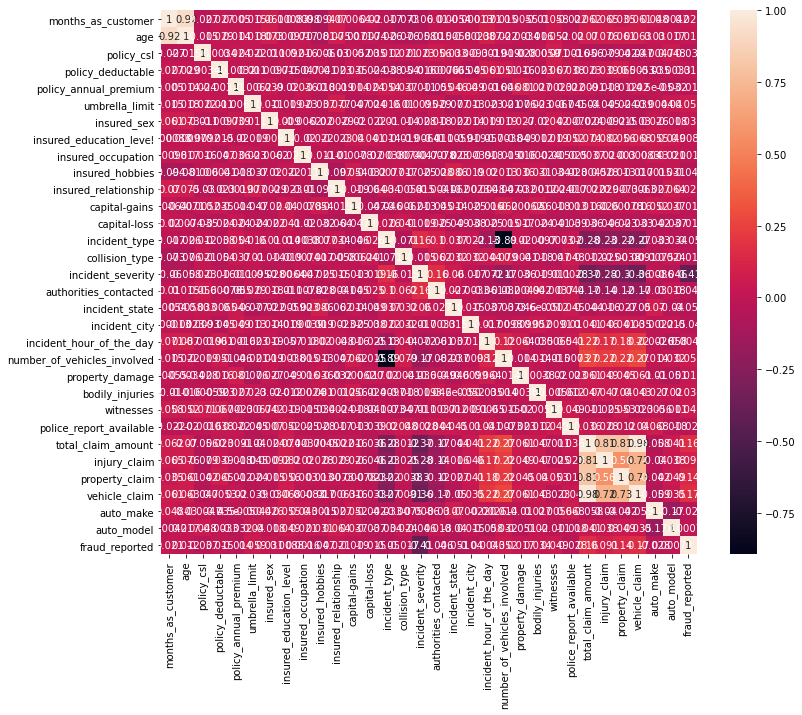

In [38]:
#correlation using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:title={'center':'Correlation with fraud_reported'}>

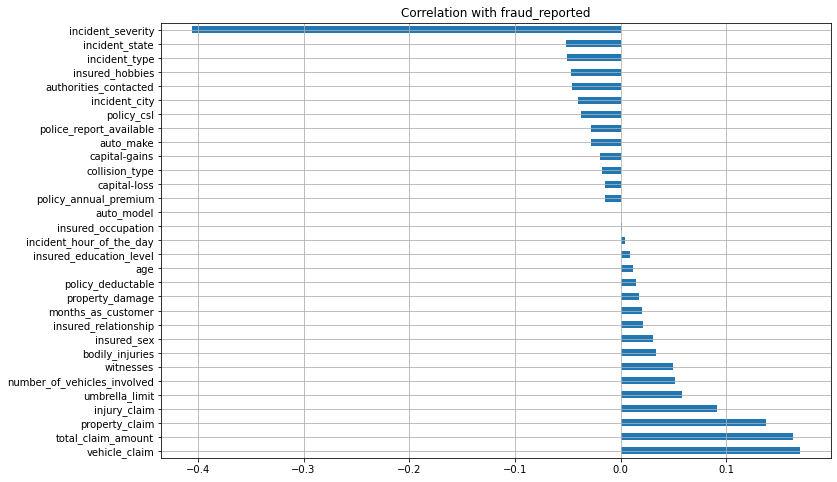

In [39]:
df.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot.barh(figsize=(12,8),grid=True,title='Correlation with fraud_reported')

Incident Severity is highly negatively correlated with our target Attribute.
Neither there is a very strong nor very weak correlation exist with target attribute.
Auto model, insured occupation has approx zero correlation with our target attribute

### Separating Input and Output

In [40]:
x=df.drop(['fraud_reported'],axis=1)
y=df[['fraud_reported']]

### Scaling Data

In [41]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaled=sc.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)
x

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model
0,1.078140,0.990836,0.060937,-0.222383,0.616705,-0.479476,1.076953,0.530931,-1.158316,1.281737,...,1.520282,0.009759,0.461838,1.478078,0.714257,-0.189283,1.165505,0.749653,0.856466,-1.645743
1,0.208995,0.334073,0.060937,1.412784,-0.242521,1.697980,1.076953,0.530931,-0.162558,0.929078,...,-0.657773,-1.210174,-1.338700,-0.676554,-1.807312,-1.363822,-1.372696,-1.823346,0.360539,-0.657470
2,-0.608002,-1.088913,-1.182668,1.412784,0.642233,1.697980,-0.928546,1.557877,1.082141,-1.363201,...,-0.657773,1.229693,1.362107,-0.676554,-0.686362,0.054644,-0.736072,-0.785565,-0.631315,0.959702
3,0.452355,0.224613,0.060937,1.412784,0.652886,2.133471,-0.928546,1.557877,-1.407256,-1.363201,...,-0.657773,0.009759,0.461838,-0.676554,0.403135,-0.224130,-0.219722,0.677607,-0.879279,1.319074
4,0.208995,0.552994,1.304542,-0.222383,1.341980,2.133471,1.076953,-1.522961,1.082141,-1.363201,...,-0.657773,-1.210174,-0.438431,-0.676554,-1.753121,-1.257232,-1.399654,-1.768252,-1.623169,1.049545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.746582,-0.103769,1.304542,-0.222383,0.222884,-0.479476,-0.928546,1.044404,-1.158316,0.576420,...,1.520282,-1.210174,-0.438431,-0.676554,1.305049,2.051155,0.273817,1.224309,-0.135388,-1.196528
996,0.704407,0.224613,-1.182668,-0.222383,0.739141,-0.479476,-0.928546,1.557877,0.584261,1.281737,...,1.520282,1.229693,1.362107,-0.676554,2.111466,2.182342,2.214794,1.821868,1.600357,0.780016
997,-0.642767,-0.541611,0.060937,-1.039966,0.520739,0.826998,-0.928546,1.044404,-1.407256,-1.186872,...,-0.657773,1.229693,1.362107,1.478078,0.558507,0.013648,0.020826,0.771902,1.104430,-0.028570
998,2.208028,2.523284,1.304542,1.412784,0.411866,1.697980,1.076953,-1.522961,-0.411497,-1.715859,...,-0.657773,-1.210174,-0.438431,1.478078,-0.219110,-0.453708,-0.451976,-0.073580,-1.375206,-1.286371


# Column Importance

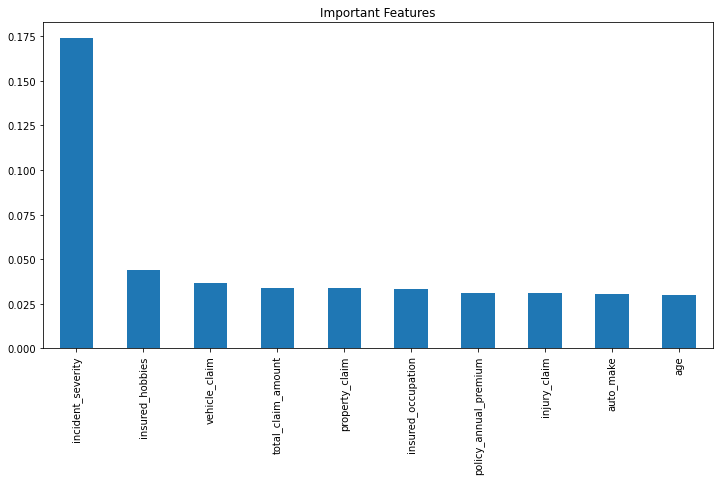

In [42]:
from sklearn.ensemble import ExtraTreesClassifier
extra=ExtraTreesClassifier()
extra.fit(x,y)

plt.figure(figsize=(12,6))
plt.title('Important Features')
feat_importance=pd.Series(extra.feature_importances_,index=x.columns)
feat_importance.nlargest(10).plot(kind='bar')
plt.show()

# Model Building

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,f1_score,roc_curve,auc
from imblearn.combine import SMOTEENN

# Lets Find the best Random state no for Maximum accuracy

In [44]:
maxAccu=0
maxRS=0


for i in range (41,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    lr=LogisticRegression()
    
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        
print('Best accuracu is',maxAccu,'on Random State',maxRS)

Best accuracu is 0.82 on Random State 65


# Divide the data into Train and Test

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=65,stratify=y)

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(750, 31) (250, 31) (750, 1) (250, 1)


In [46]:
lr=LogisticRegression()
svc=SVC()
gnb=GaussianNB()
knn=KNeighborsClassifier()
rfc=RandomForestClassifier()

In [47]:
models=[]
models.append(('LogisticRegression',lr))
models.append(('GaussianNB',gnb))
models.append(('RandomForestClassifier',rfc))
models.append(('KNeighborsClassifier',knn))
models.append(('SVC',svc))

LogisticRegression


LogisticRegression()


Accuracy_score= 0.764


Cross_Val_Score= 0.774


roc_auc_score= 0.637697323266987


classification_report
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       188
           1       0.53      0.39      0.45        62

    accuracy                           0.76       250
   macro avg       0.67      0.64      0.65       250
weighted avg       0.74      0.76      0.75       250



[[167  21]
 [ 38  24]]





GaussianNB


GaussianNB()


Accuracy_score= 0.724


Cross_Val_Score= 0.7150000000000001


roc_auc_score= 0.6435312285518189


classification_report
               precision    recall  f1-score   support

           0       0.83      0.80      0.81       188
           1       0.45      0.48      0.47        62

    accuracy                           0.72       250
   macro avg       0.64      0.64      0.64       250
weighted avg       0.73      0.72      0.73       250



[[151  37]
 [ 

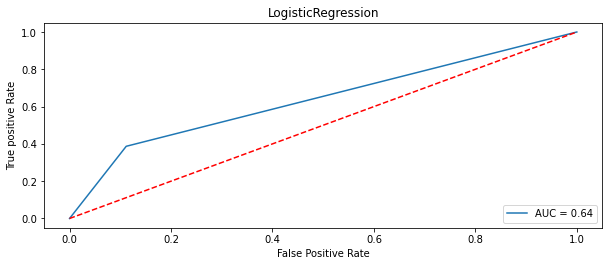

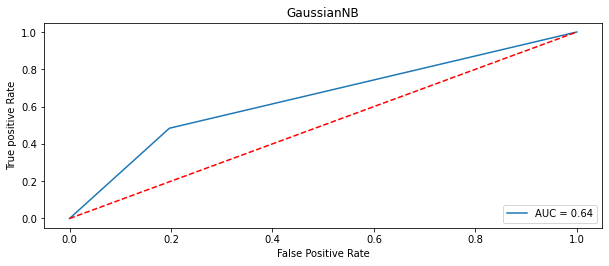

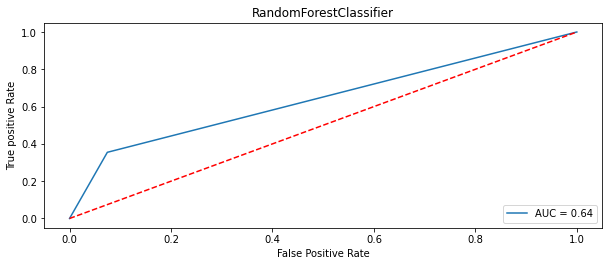

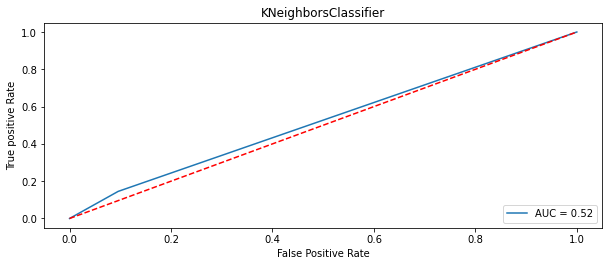

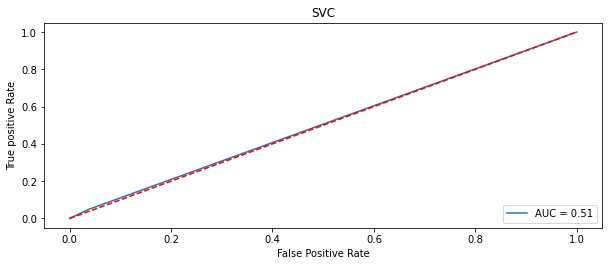

In [48]:
Model=[]
score=[]
CVS=[]
rocscore=[]
for name,model in models:
    print(name)
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score=',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross_Val_Score=',sc)
    CVS.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,threshold=roc_curve(y_test,pre)
    roc_auc= auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score=',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [49]:
result = pd.DataFrame({'Model':Model,'Accuracy_score': score,'cross_val_score':CVS,'Roc_auc_curve':rocscore})
result

,Model,Accuracy_score,cross_val_score,Roc_auc_curve
0,LogisticRegression,76.4,77.4,63.769732
1,GaussianNB,72.4,71.5,64.353123
2,RandomForestClassifier,78.4,77.0,64.018531
3,KNeighborsClassifier,71.6,71.9,52.470830
4,SVC,73.6,74.8,50.557653


We could see that Logistic Regression is our best model among all because it givers us a very good accuracy & f 1 score with least difference with cross validation score so we will Logistic regression as our best model

# Hyperparameter Tuning

In [50]:
sm=SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x,y)
x_train,x_test,y_train,y_test=train_test_split(X_resampled,y_resampled,random_state=78,test_size=.20,stratify=y_resampled)
lg_1=LogisticRegression()
param={'penalty':['l2','l1','elasticnet'],'C':[.001,.01,.1,1,10],'solver':['newton-cg','lbfgs','liblinear','sag','saga'],'max_iter':[50,100,200]}

grid=GridSearchCV(estimator=lg_1,param_grid=param,scoring='accuracy',n_jobs=-1)

grid.fit(x_train,y_train)

grid.best_params_

{'C': 1, 'max_iter': 50, 'penalty': 'l2', 'solver': 'liblinear'}

In [51]:
lg_final=LogisticRegression(C=0.1,max_iter=50,penalty='l2',solver='liblinear')
lg_final.fit(x_train,y_train)
pred=lg_final.predict(x_test)
print('Final Accuracy_score :',accuracy_score(pred,y_test))
print('\n')
print('Final f_1 score :',f1_score(pred,y_test))
print('\n')
print('Final roc_auc score :',roc_auc_score(pred,y_test))
print('\n')
print('Final classification Report :',classification_report(pred,y_test))
print('\n')
print('Final confusion Matrix :',confusion_matrix(pred,y_test))

Final Accuracy_score : 0.9075144508670521


Final f_1 score : 0.9420289855072465


Final roc_auc score : 0.8733766233766233


Final classification Report :               precision    recall  f1-score   support

           0       0.73      0.82      0.77        33
           1       0.96      0.93      0.94       140

    accuracy                           0.91       173
   macro avg       0.84      0.87      0.86       173
weighted avg       0.91      0.91      0.91       173



Final confusion Matrix : [[ 27   6]
 [ 10 130]]


# Saving our Model

In [52]:
import joblib
joblib.dump('lg','Fraud_detection.pkl')

['Fraud_detection.pkl']